In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
df =pd.read_excel('cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df.shape

(30000, 38)

In [6]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [11]:
df.duplicated().sum()

0

In [9]:
df['Gender'] =df['Gender'].fillna('F')
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [10]:
df.iloc[:,3:].sample(20)

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
18735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7372,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14235,1,4,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10524,4,0,0,0,3,0,0,0,0,0,...,0,2,4,0,0,0,2,1,0,0
23181,1,2,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
12408,1,0,0,0,0,0,0,0,5,0,...,0,0,1,0,0,0,0,0,0,0
28565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2757,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
26014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27612,0,1,8,0,0,1,0,0,5,0,...,0,0,1,0,0,0,0,0,0,1


In [14]:
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T  # no outliers at minimum here we exclude the cust_id because that is not the
#important column for apply KMeans

,count,mean,std,min,1%,2%,3%,5%,50%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,300.99,600.98,900.97,1500.95,15000.5,30000.0
Orders,30000.0,4.169800,3.590311,0.0,0.00,0.00,0.00,0.00,4.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.00,0.00,0.00,0.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.00,0.00,0.00,0.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.00,0.00,0.00,0.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.00,0.00,0.00,0.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.00,0.00,0.00,0.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.00,0.00,0.00,0.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.00,0.00,0.00,0.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.00,0.00,0.00,0.0,16.0


In [15]:
df.describe(percentiles=[0.95,0.97,0.98,0.99]).T # everone outliers at maximum

,count,mean,std,min,50%,95%,97%,98%,99%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,15000.5,28500.05,29100.03,29400.02,29700.01,30000.0
Orders,30000.0,4.169800,3.590311,0.0,4.0,10.00,11.00,11.00,12.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,2.00,2.00,3.00,4.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,2.00,2.00,2.00,3.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,1.00,2.00,3.00,5.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,1.00,2.00,2.00,4.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,1.00,1.00,2.00,3.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,1.00,1.00,2.00,2.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,1.00,1.00,2.00,3.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,1.00,1.00,2.00,2.00,16.0


In [16]:
# for now we avoid removing of outliers

In [12]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [13]:
x = df.iloc[:,2:]
print(x.columns)

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')


In [15]:
from sklearn.cluster import KMeans

WCSS
 [918493.4415000014, 616586.8209608577, 568242.790397475, 543064.3359512675, 523273.65742770594, 507191.809472773, 492528.56140096375, 480066.349188895, 472785.15923198365, 463825.3325500577, 453287.966358183]


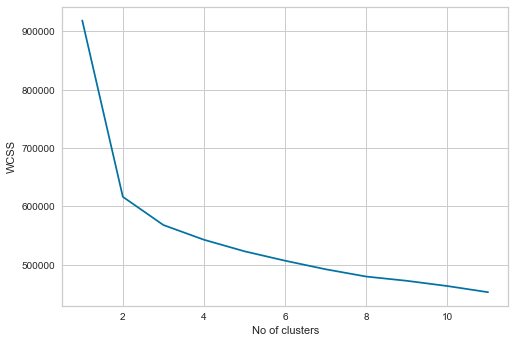

In [16]:
wcss = []
for i in range(1,12): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(x)   # in unsupervised we dont have have y so we only pass 'x' here
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,12)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
for i in range(2,12):
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhouette_score at k={i}',silhouette_score(x,m.labels_))

Silhouette_score at k=2 0.33837516300865234
Silhouette_score at k=3 0.20313881710635542
Silhouette_score at k=4 0.2022216978097967
Silhouette_score at k=5 0.2047195536202771
Silhouette_score at k=6 0.13194160401602684
Silhouette_score at k=7 0.13282109028789946
Silhouette_score at k=8 0.15289715547850213
Silhouette_score at k=9 0.1309631975388599
Silhouette_score at k=10 0.15081945645556122
Silhouette_score at k=11 0.148256898031393


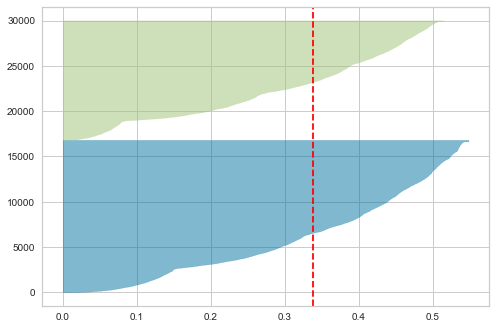

In [21]:
m2 =KMeans(n_clusters =2)
visualizer = SilhouetteVisualizer(m2,colors='yellowbrick')
visualizer.fit(x)
plt.show()

## Inference
From Silhouette method the optimal number of clusters is 2

## apply kmeans at K = 2

In [23]:
k2 = KMeans(n_clusters = 2)
k2.fit(x)
ypred2 =k2.predict(x)
print(ypred2)

[0 1 0 ... 1 1 1]


In [24]:
cent2 = k2.cluster_centers_
print(cent2)

[[7.75358579 0.28003339 0.27456933 0.23791455 0.17378766 0.14927525
  0.14457008 0.10859832 0.11633908 0.08962586 0.14487364 0.35470896
  0.20285346 0.1488958  0.16642635 0.10374137 0.32184868 0.05122562
  0.79137892 0.25514153 0.47415952 0.26553844 0.12301738 0.02914169
  0.44243758 0.12514229 0.09675951 0.27737725 0.38559611 0.16096228
  0.07763527 0.05570312 0.19473325 0.12256204 0.09068832 0.06746604]
 [1.36271771 0.25756405 0.23491648 0.21119895 0.1515782  0.13903584
  0.13600428 0.1056292  0.1075908  0.09790168 0.13642038 0.30743625
  0.21440885 0.13564763 0.15692802 0.10794745 0.28330262 0.04559234
  0.72614872 0.2422279  0.46822802 0.25209535 0.1154372  0.0341794
  0.41675088 0.11834988 0.10705582 0.26624264 0.35790287 0.15740355
  0.07769126 0.05861024 0.19021578 0.111514   0.08595375 0.07358973]]


In [25]:
df['Cls2'] = ypred2

In [26]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cls2
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [43]:
res = df.iloc[:,2:].groupby(['Cls2']).mean()
res.T

Cls2,0,1
Orders,1.362718,7.753586
Jordan,0.257564,0.280033
Gatorade,0.234916,0.274569
Samsung,0.211199,0.237915
Asus,0.151578,0.173788
Udis,0.139036,0.149275
Mondelez International,0.136004,0.144570
Wrangler,0.105629,0.108598
Vans,0.107591,0.116339
Fila,0.097902,0.089626
